In [2]:
import pandas as pd
import seaborn as sns
import os
import os.path as osp
import matplotlib.pyplot as plt
import collections

In [3]:
path = "../test.csv"
df = pd.read_csv(path)
dst = 'figures'
model='resnet34'
drop_names = None # ['GraSP']#['ERK', "SNIP", 'iterSNIP', 'Rand']

In [4]:
subdf = df.loc[df.model_type == model]

In [5]:
import numpy as np
import math
sns.set(font_scale=1.5)
def double_axis_plot(data, x, y1, y2,  hue_type, drop=None, x_name=None, y1_name = None, y2_name = None, title=None, save=False, ylim=None, xlim=None, y1_std=None, y2_std=None):
    data = data.copy()
    plt.figure(figsize=(12, 8))
    if drop:
        for d in drop:
            data = data.loc[data.prune_type != d]    
   
    data = data.sort_values(by=[x])
    ax = sns.lineplot(data=data, x=x, y=y1, hue=hue_type, marker='o', linewidth=2.5, markersize=9)

    ax.grid()
    ax.set_ylabel(y1_name)
    ax.set_xlabel(x_name)
    ax.set_title(title)
    if y2 is not None:
        ax2 = ax.twinx()
        sns.lineplot(data=data, x=x, y=y2, hue=hue_type, ax=ax2, linestyle="dashed", marker='P', linewidth=2.5, markersize=12)

        ax.get_legend().remove()
        ax2.grid()
        ax2.set_ylabel(y2_name)
        ax2.legend(loc=4)
    ax.grid()
    ax2.grid()
    
    def std(name):
        if 'mean' in name:
            std = name.replace('mean', 'std')
        else:
            std = name + "_std"
        return std
    for x_i in data[hue_type].unique().tolist():
        subdata = data.loc[data[hue_type] == x_i]
        if y1_std:
            ax.fill_between(subdata[x], y1=subdata[y1] - subdata[y1_std], y2=subdata[y1] +  subdata[y1_std], alpha=.5)
        if y2_std:
            ax2.fill_between(subdata[x], y1=subdata[y2] - subdata[y2_std], y2=subdata[y2] + subdata[y2_std], alpha=.5)

    if ylim is not None:
        ax.set_ylim(ylim)
    if xlim is not None:
        ax.set_xlim(xlim)
    if save:
        plt.tight_layout()
        plt.savefig(osp.join(dst, title+".svg"))

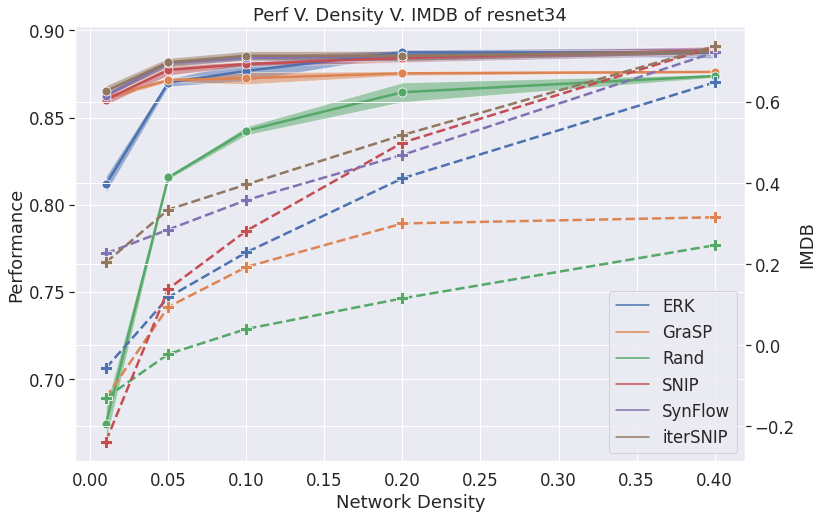

In [14]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="stable_irm_norm_mean", y1_std='acc_std', hue_type='prune_type', x_name="Network Density", y1_name='Performance', y2_name="IMDB",
                drop=drop_names, title=f"Perf V. Density V. IMDB of {model}", save=False)

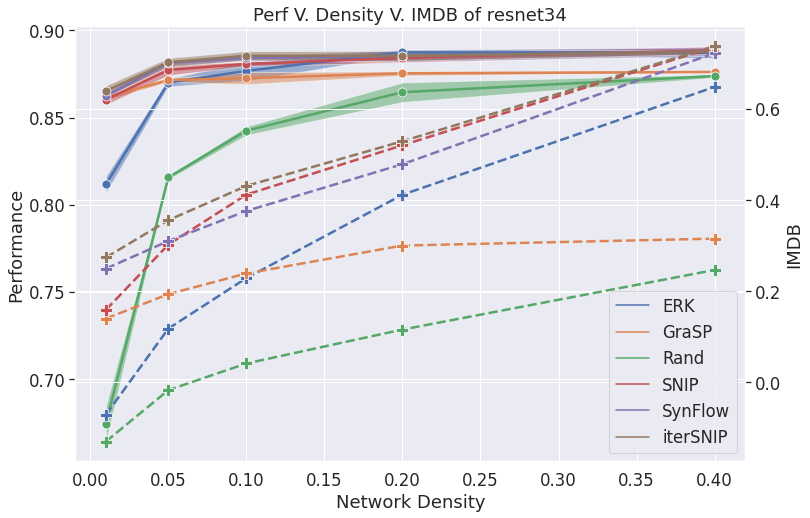

In [11]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="irm_norm_mean", y1_std='acc_std', hue_type='prune_type', x_name="Network Density", y1_name='Performance', y2_name="IMDB",
                drop=drop_names, title=f"Perf V. Density V. IMDB of {model}", save=False)

In [ ]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="rm_norm_mean", hue_type='prune_type', x_name="Network Density", y1_name='Performance', y2_name="\u0394 r",
                drop=drop_names, title=f"Perf V. Density V. \u0394 r of {model}", save=True, y1_std="acc_std")

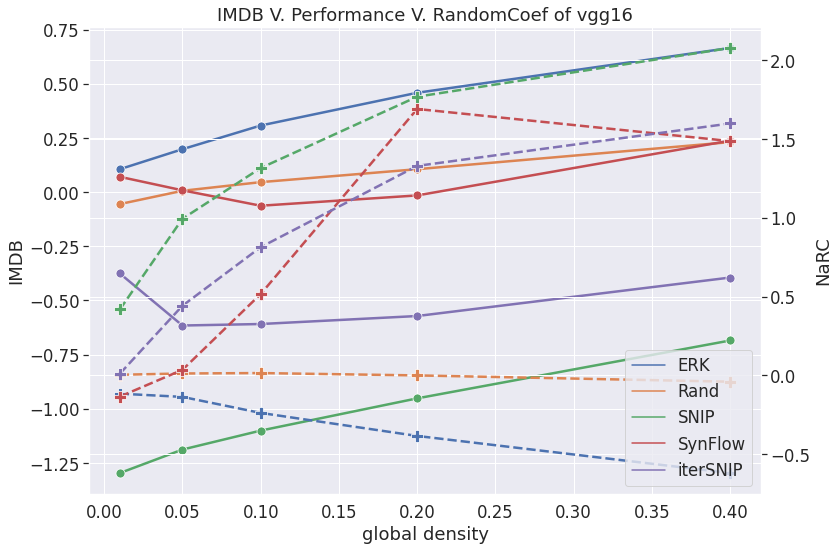

In [332]:
double_axis_plot(subdf, x='global_density', y1='rm_norm_mean', y2="random_factor_mean", hue_type='prune_type', x_name="global density", y1_name='IMDB', y2_name="NaRC",
                drop=drop_names, title=f"IMDB V. Performance V. RandomCoef of {model}", save=True)

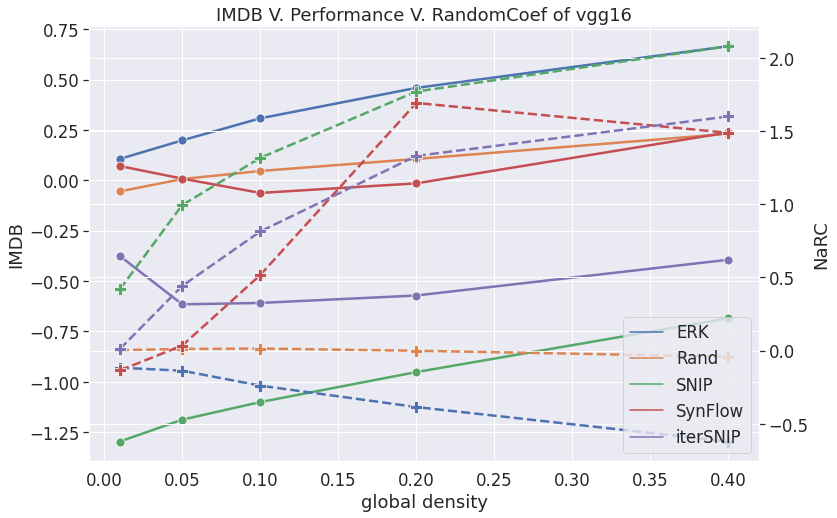

In [333]:
double_axis_plot(subdf, x='global_density', y1='rm_norm_mean', y2="random_factor_mean", hue_type='prune_type', x_name="global density", y1_name='IMDB', y2_name="NaRC",
                drop=drop_names, title=f"IMDB V. Performance V. RandomCoef of {model}", save=False)

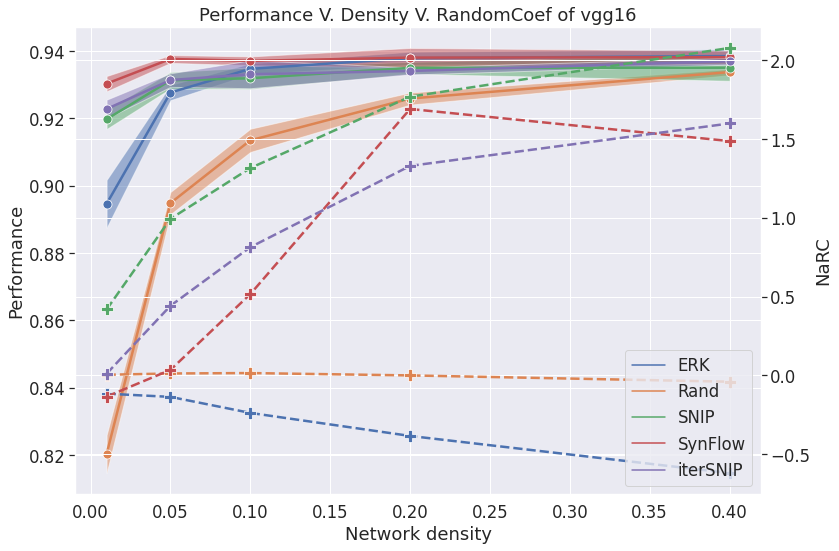

In [334]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="random_factor_mean", hue_type='prune_type', x_name="Network density", y1_name='Performance', y2_name="NaRC",
                drop=drop_names, title=f"Performance V. Density V. RandomCoef of {model}", save=True, y1_std='acc_std')

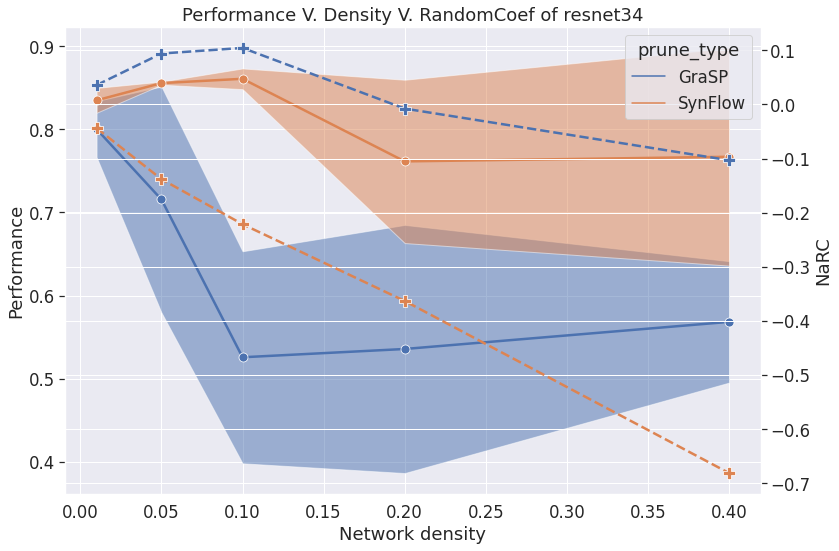

In [316]:
double_axis_plot(subdf, x='global_density', y1='acc', y2="random_factor_mean", hue_type='prune_type', x_name="Network density", y1_name='Performance', y2_name="NaRC",
                drop=drop_names, title=f"Performance V. Density V. RandomCoef of {model}", save=True, y1_std='acc_std')

In [9]:
subdf

,model_type,prune_type,global_density,sparsity_mean,sparsity_std,sparsity_count,sm_mean,sm_std,sm_count,rm_mean,...,sm_norm_mean,sm_norm_std,sm_norm_count,stable_irm_norm_mean,stable_irm_norm_std,stable_irm_norm_count,perc_ram_by_rm_mean,perc_ram_by_irm_mean,acc,acc_std
0,resnet34,ERK,0.01,0.061731,0.167480,1.0,-0.158907,3.029241,0.936937,0.339646,...,-0.082251,0.205818,0.936937,-0.057165,0.191781,1.000000,0.126126,0.045045,0.811567,0.004834
1,resnet34,GraSP,0.01,0.083990,0.106943,1.0,-0.936949,2.019945,0.891892,-2.243287,...,-0.088174,0.182458,0.891892,-0.130253,0.386067,0.891892,0.198198,0.495495,0.861567,0.001701
2,resnet34,Rand,0.01,0.009950,0.000428,1.0,-1.170956,0.292588,0.162162,-0.543807,...,-0.148596,0.030829,0.162162,-0.130303,0.023996,0.513514,0.000000,0.000000,0.674233,0.010281
3,resnet34,SNIP,0.01,0.103926,0.169674,1.0,-2.452659,3.369833,0.891892,-4.449799,...,-0.194590,0.232067,0.891892,-0.238457,0.472533,0.891892,0.081081,0.378378,0.860233,0.002902
4,resnet34,SynFlow,0.01,0.083138,0.128337,1.0,2.188948,1.222183,0.918919,2.608199,...,0.165493,0.089133,0.918919,0.225454,0.109063,0.936937,0.891892,0.819820,0.862633,0.001450
5,resnet34,iterSNIP,0.01,0.116637,0.182442,1.0,-1.294367,4.436272,0.747748,-1.696863,...,-0.060419,0.287400,0.747748,0.203499,0.228544,0.882883,0.171171,0.684685,0.865167,0.003301
12,resnet34,ERK,0.40,0.731112,0.296462,1.0,19.128025,14.119635,1.000000,24.095799,...,0.591302,0.433648,1.000000,0.647566,0.373639,1.000000,1.000000,1.000000,0.887200,0.003105
13,resnet34,GraSP,0.40,0.427355,0.159256,1.0,4.842181,2.686583,1.000000,8.145587,...,0.176901,0.092762,1.000000,0.314780,0.016670,1.000000,0.972973,1.000000,0.876167,0.000416
14,resnet34,Rand,0.40,0.399382,0.002421,1.0,3.557404,1.498026,1.000000,7.634712,...,0.124257,0.059049,1.000000,0.245849,0.018517,1.000000,1.000000,0.990991,0.873833,0.000924
15,resnet34,SNIP,0.40,0.795088,0.309623,1.0,7.841149,17.080893,1.000000,11.936591,...,0.299073,0.468981,1.000000,0.735552,0.132201,1.000000,0.711712,1.000000,0.888633,0.002316
